# Part 1 : Graded


### Setup


In [1]:
# DO NOT EDIT
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# DO NOT EDIT
# !wget https://probability4datascience.com/data/ch3_data_english.txt

### [15 Marks] Task 1 : Plot Histogram

In this task, you will plot the frequency histogram of the 26 English Alphabets from a given text. For this purpose, you will be implementing the function plot_frequency_histogram which takes filename as the parameter.


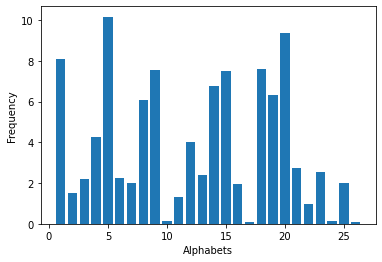

In [3]:
def plot_frequency_histogram(filename: str):
    # Load the the text file into an numpy array.
    file = np.loadtxt(filename, dtype=float)
    
    alphabets = np.array(list(range(1,27)))
    # Normalize the input to convert it into probabilities.

    # Plot the histogram using plt.bar()
    plt.bar(alphabets, file)

    # The axes should be labelled correctly and have an appropriate title
    plt.xlabel("Alphabets")
    plt.ylabel("Frequency")

    # Display Plot
    plt.show()


## DON'T CHANGE THIS LINE
plot_frequency_histogram("./ch3_data_english.txt")


### [15 Marks] Task 2 : PMF

In this task, you will simulate the throwing of a fair six sided die $n$ times. You are required to experiment with reasonable values of $n$ and for each value you are required to comment how the shape of the each obtained histogram compares with the ideal PMF.


In [4]:
# DO NOT EDIT
def approximate_PMF(N: list):
    """
    N : Values of n for which the experiment is conducted
    """
    # SET SEED FOR REPRODUCIBILITY
    np.random.seed(0)
    # Plotting the ideal PMF
    fair = np.arange(1, 7)
    plt.hist(fair,
             bins=[1, 2, 3, 4, 5, 6, 7],
             rwidth=0.5,
             density=True,
             align='left')
    plt.title('PMF')
    plt.show()
    # Simulation
    for i in range(len(N)):
        # Simulate die roll. Size determines the number of times the die is rolled.
        fair = np.random.randint(low=1, high=7, size=N[i])
        # Plot Histogram.
        plt.hist(fair,
                 bins=[1, 2, 3, 4, 5, 6, 7],
                 rwidth=0.5,
                 density=True,
                 align='left')
        plt.title("N  = %i " % (N[i]))
        plt.show()

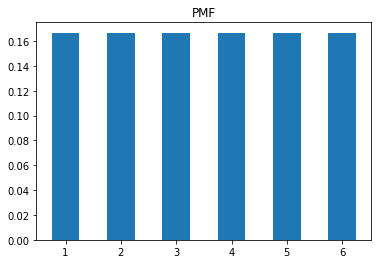

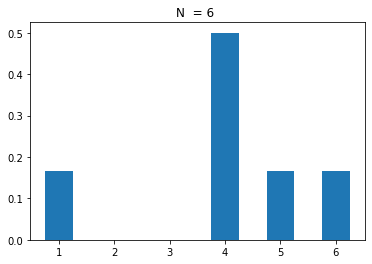

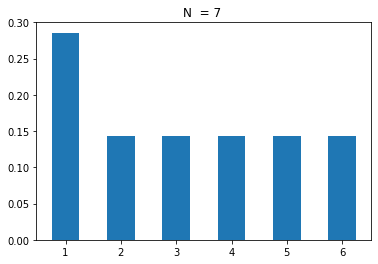

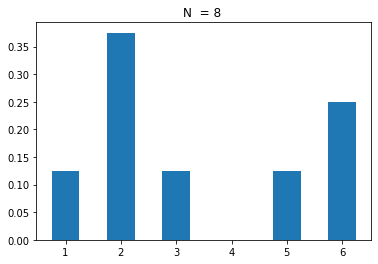

In [5]:
approximate_PMF([i for i in range(6, 9)])


**Write your answer here.**

The bars are different from the ideal bars because we have used psudeorandom numbers to model them. Our experiment can tend towards the ideal bar if we do this for large amount of time and add the result.

### [20 Marks] Task 3 : Expectation , Variance & Moments

In Task 2, you plotted simulated the throwing of a fair die $n$ times. In Task 3, you are required to compute the expectation, variance and moment for each value of $n$ and compare with the actual expectation. For this purpose, you will be implementing the function compute_expectation_variance_moment. In addition, comment on how these values relate to the value of N.

Hint : Use np.unique to get frequency counts in a numpy array


In [6]:
# Compute Expectation
def compute_expectation(x: np.array, p: np.array):
    return np.dot(x, p)


# Compute Variance
def compute_variance(x: np.array, p: np.array):
    mu = compute_expectation(x, p)
    return compute_expectation(np.power(x - mu, 2), p)


# Compute Second Moment
def compute_2nd_moment(x: np.array, p: np.array):
    x2 = np.power(x, 2)
    return compute_expectation(x2, p)


def compute_expectation_variance_moment(N: list):
    p = np.array([1/6 for _ in range(6)])
    for n in N:
        print("N = {val}".format(val=n))
        # Simulate Fair Die Roll
        x = np.random.randint(low=1, high=7, size=6)
        # Compute Expectation
        EX = compute_expectation(x, p)
        # Compute Variance
        Var = compute_variance(x, p)
        # Compute 2nd Moment
        EX2 = compute_2nd_moment(x, p)
        print(
            "Expectation : {ex:.2f} ,  Variance : {var:.2f} , 2nd Moment : {moment:.2f}"
            .format(ex=EX, var=Var, moment=EX2))


In [7]:
compute_expectation_variance_moment([6,5,4,3])

N = 6
Expectation : 2.83 ,  Variance : 2.47 , 2nd Moment : 10.50
N = 5
Expectation : 2.83 ,  Variance : 3.14 , 2nd Moment : 11.17
N = 4
Expectation : 3.50 ,  Variance : 2.58 , 2nd Moment : 14.83
N = 3
Expectation : 2.83 ,  Variance : 1.81 , 2nd Moment : 9.83


**Write your answer here.**


### [30 Marks] Task 4 : Common Discrete Random Variables

In Task 1, you were introducted to Random Variables. In Task 2, you were introduced to PMF's. In Task 3, you were introduced to computing Expectation, Variance and Moments. In Task 4, you will be introduced to Common DRVs that you have already discussed in class. The aim of Task 4 is to introduce you the simulation of these DRVs in Python. In this task, you are required to vary parameters for each distrubution while keeping others constant and comment on how does this affect the mean , variance and the distrubution.


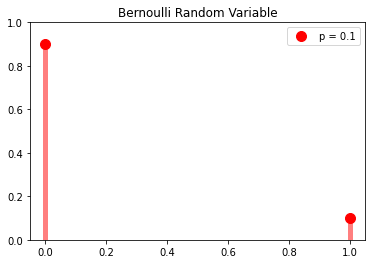

Mean : 0.10 , Variance : 0.09 


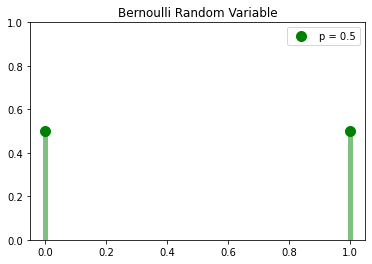

Mean : 0.50 , Variance : 0.25 


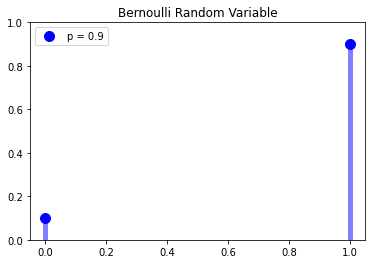

Mean : 0.90 , Variance : 0.09 


In [8]:
# DO NOT EDIT
# Generate Bernoulli Random Variable Object
def generate_bernoulli_rv(P: list):
    """P : Diffrent values for probability of success"""
    colors = ['r', 'g', 'b']
    for i in range(len(P)):
        p = P[i]
        # p is the probability of a single success.
        rv = stats.bernoulli(p)  # Create Bernoulli Random Variable
        mean, var = rv.stats(moments='mv')  # Compute Mean and Variance
        x = np.arange(2)
        f = rv.pmf(x)
        # Plot PMF
        # ms: size of o
        plt.plot(x, f, colors[i] + 'o', ms=10)
        # alpha: transparency of the line
        # lw: line width
        # Plot VLINES
        plt.vlines(x, 0, f, colors=colors[i], lw=5, alpha=0.5)
        plt.ylim(0, 1)
        plt.legend(labels=["p = {v}".format(v=p)])
        plt.title("Bernoulli Random Variable")
        plt.show()
        print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean, v=var))


generate_bernoulli_rv([0.1, 0.5, 0.9])

**Write your answer (Bernoulli RV)**

The mean of the Bernoulli Ditribution is the probablity of the happening of the event. While the vairance of the distribution is the product of the probablities of happening and not happening of an event.

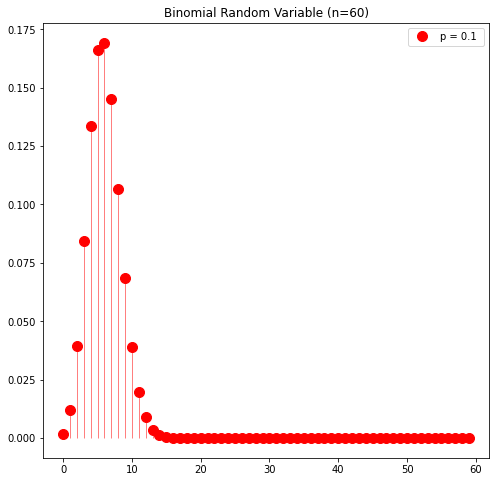

Mean : 6.00 , Variance : 5.40 


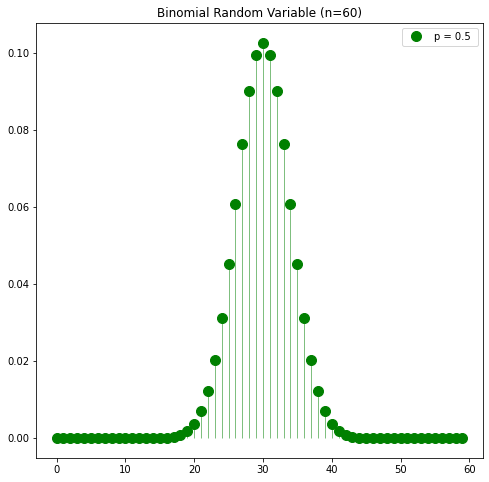

Mean : 30.00 , Variance : 15.00 


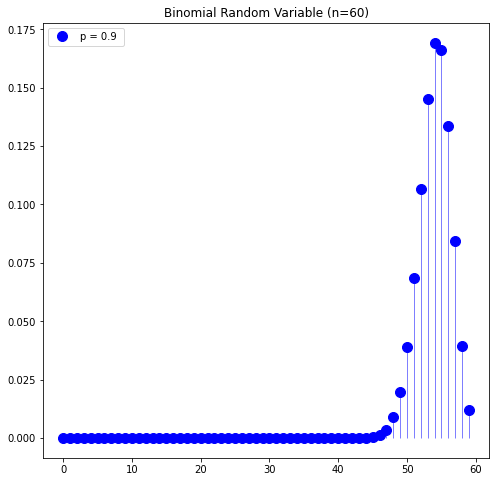

Mean : 54.00 , Variance : 5.40 


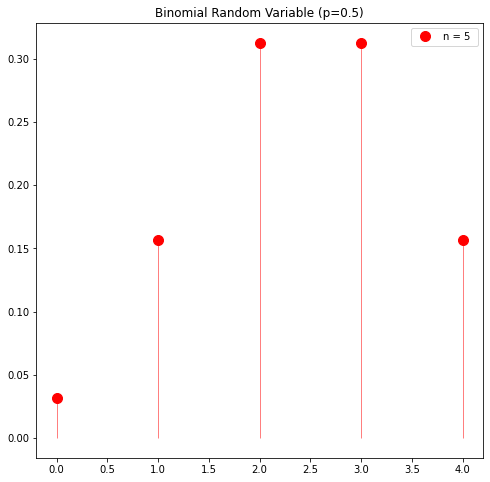

Mean : 2.50 , Variance : 1.25 


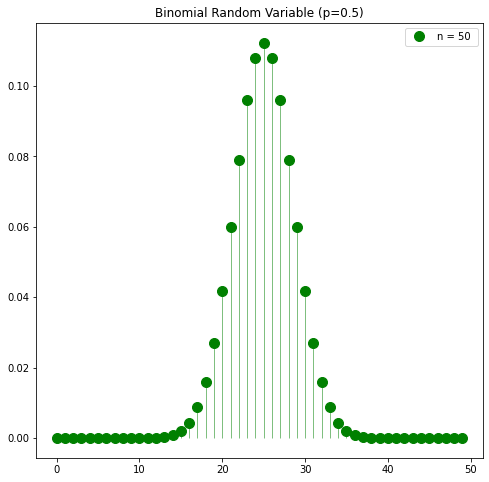

Mean : 25.00 , Variance : 12.50 


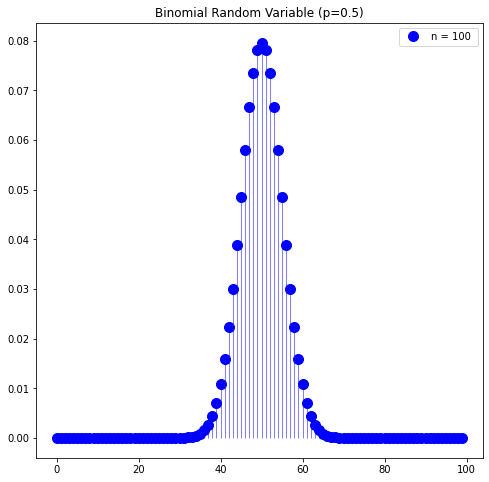

Mean : 50.00 , Variance : 25.00 


In [9]:
# DO NOT EDIT
# Generate Binomial Random Variable Object
def generate_binomial_rv(P: list, N: list):
    """
    P : Diffrent values for probability of Success
    N : Diffrent values of n"""
    colors = ['r', 'g', 'b']
    for i in range(len(P)):
        p = P[i]
        # p is the probability of a single success.
        n = 60  # Keep n fixed and vary p
        rv = stats.binom(n, p)  # Create Binomial Random Variable
        mean, var = rv.stats(moments='mv')  # Compute Mean and Variance
        x = np.arange(n)
        f = rv.pmf(x)
        # Plot PMF
        # ms: size of o
        plt.figure(figsize=(8, 8))
        plt.plot(x, f, colors[i] + 'o', ms=10)
        # alpha: transparency of the line
        # lw: line width
        # Plot VLINES
        plt.vlines(x, 0, f, colors=colors[i], lw=1, alpha=0.5)
        plt.legend(labels=["p = {v} ".format(v=p)])
        plt.title("Binomial Random Variable (n=60)")
        plt.show()
        print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean, v=var))

    for i in range(len(N)):
        n = N[i]
        # p is the probability of a single success.
        p = 0.5  # Keep p fixed and vary n
        rv = stats.binom(n, p=0.5)  # Create Binomial Random Variable
        mean, var = rv.stats(moments='mv')  # Compute Mean and Variance
        x = np.arange(n)
        f = rv.pmf(x)
        # Plot PMF
        # ms: size of o
        plt.figure(figsize=(8, 8))
        plt.plot(x, f, colors[i] + 'o', ms=10)
        # alpha: transparency of the line
        # lw: line width
        # Plot VLINES
        plt.vlines(x, 0, f, colors=colors[i], lw=1, alpha=0.5)
        plt.legend(labels=["n = {n1} ".format(n1=n)])
        plt.title("Binomial Random Variable (p=0.5)")
        plt.show()
        print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean, v=var))


generate_binomial_rv([0.1, 0.5, 0.9], [5, 50, 100])


**Write your answer (Binomial RV)**


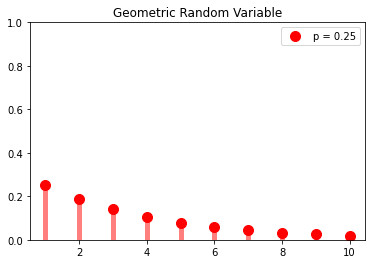

Mean : 4.00 , Variance : 12.00 


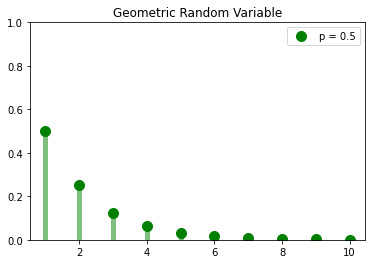

Mean : 2.00 , Variance : 2.00 


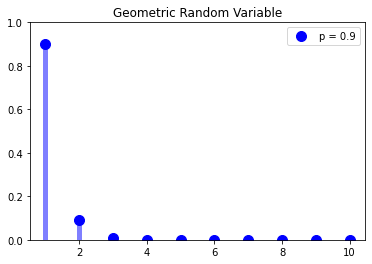

Mean : 1.11 , Variance : 0.12 


In [10]:
# DO NOT EDIT
# Generate Geometric Random Variable Object
def generate_geometric_rv(P: list):
    """P : Diffrent values for probability of success"""
    colors = ['r', 'g', 'b']
    for i in range(len(P)):
        p = P[i]
        # p is the probability of a single success.
        rv = stats.geom(p)  # Create Geometric Random Variable
        mean, var = rv.stats(moments='mv')  # Compute Mean and Variance
        x = np.arange(1, 11)
        f = rv.pmf(x)
        # Plot PMF
        # ms: size of o
        plt.plot(x, f, colors[i] + 'o', ms=10)
        # alpha: transparency of the line
        # lw: line width
        # Plot VLINES
        plt.vlines(x, 0, f, colors=colors[i], lw=5, alpha=0.5)
        plt.ylim(0, 1)
        plt.legend(labels=["p = {v}".format(v=p)])
        plt.title("Geometric Random Variable")
        plt.show()
        print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean, v=var))


generate_geometric_rv([0.25, 0.5, 0.9])


**Write your answer (Geometric RV)**


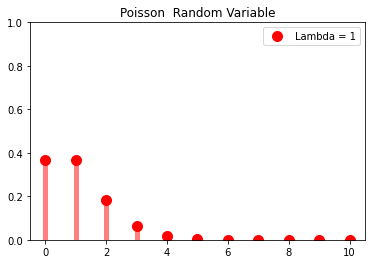

Mean : 1.00 , Variance : 1.00 


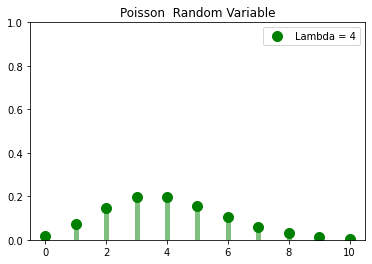

Mean : 4.00 , Variance : 4.00 


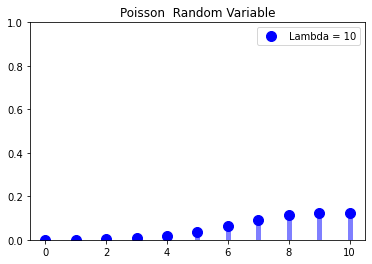

Mean : 10.00 , Variance : 10.00 


In [11]:
# DO NOT EDIT
# Generate Poisson Random Variable Object
def generate_poisson_rv(Lambda: list):
    """Lambda : Diffrent lambda for probability of success"""
    colors = ['r', 'g', 'b']
    for i in range(len(Lambda)):
        lambd = Lambda[i]
        # lambda is the Poisson Rate
        rv = stats.poisson(lambd)  # Create Poisson Random Variable
        mean, var = rv.stats(moments='mv')  # Compute Mean and Variance
        x = np.arange(11)
        f = rv.pmf(x)
        # Plot PMF
        # ms: size of o
        plt.plot(x, f, colors[i] + 'o', ms=10)
        # alpha: transparency of the line
        # lw: line width
        # Plot VLINES
        plt.vlines(x, 0, f, colors=colors[i], lw=5, alpha=0.5)
        plt.ylim(0, 1)
        plt.legend(labels=["Lambda = {v}".format(v=lambd)])
        plt.title("Poisson  Random Variable")
        plt.show()
        print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean, v=var))


generate_poisson_rv([1, 4, 10])


**Write your answer here (Poisson RV)**


### [20 Marks] Task 5: Birthday Paradox

One of the benefits of using code to compute probability is that the time-consuming calculations can be skipped. This can be seen by the Birthday's Paradox Problem.

**Problem Statement**: Given there are $n$ students in the class, assuming that none are not born in a leap year, find the probability that at least 2 people share a birthday.

For $0<=n<=366$
$$P(\mbox{none share}) = ∏_{k=1}^{k=n} \frac{365-k+1}{365}$$
Let the empty product be 1.
Therefore the desired probability can be computed for $0<=n<=366$
$$P(\mbox{at least 2 people share}) = 1- ∏_{k=1}^{k=n} \frac{365-k+1}{365}$$

The following is a simple code snippet to show how it can be plotted in Python.


In [12]:
# DO NOT EDIT
def birthday_paradox(n):
    number_of_students = []
    probabilities = []
    product = 1
    for k in range(1, n + 1):
        product *= (365 - k + 1) / 365
        number_of_students.append(k)
        probabilities.append(1 - product)
    return number_of_students, probabilities


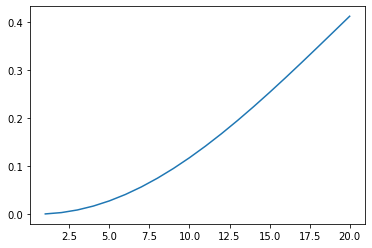

In [13]:
x, y = birthday_paradox(20)
#Task 1
plt.plot(x, y)


**Tasks:**

1. The graph is incomplete. It doesn't have any labels, add the labels and feel free to make it aesthetic.

2. When solving any problems regarding probability, we should be vary of our assumptions. In this problem, we made two assumptions (which is not stated) for computing the probability. State those assumptions. (Hint for one of the assumptions: Our logic breaks in the case of twins)

3. If $n=400$, $k=380$, in the product will give us a negative value. Does it mean that this algorithm will fail for $k-380$?. See whether it does. If it does, then fix the error in the code. If it doesn't state why and whether the computation for $k\geq 367$ is representative of something or not, if it isn't update the code to reflect this?

After making the respective changes, draw the graph for $n=500$


In [14]:
# TASK 3
def birthday_paradox_new(n):
    pass


SyntaxError: 'continue' not properly in loop (3600002717.py, line 3)

**Write answer of 3 here.**


# Part 2 : Ungraded


**This is an ungraded question. Feel free to solve this problem. There are no bonus marks for attempting this task.**


### [0 Marks] Task 6: Simulating the entire sample place

In the above scenario, we saw that if we know the formula for computing the probability, we can easily code it. This is useful in some situations, but this is not the only thing that can be done to make our lives easier. We can compute the entire sample space for combinatorial problems (of reasonable size).

As an illustration, we can use it on a friendship graph. Suppose that we know that 3 of the links have broken apart and each of the

For example take the case of a network.

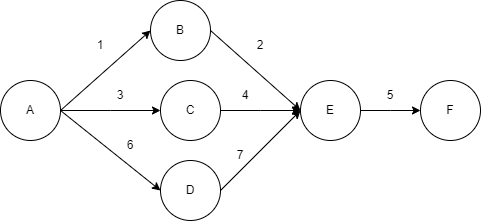


Given a network of nodes and edges, if 3 connections break what is the probability that a signal can go from A to F.

One thing we can do is generate all the possible combinations of lines that can be broken and assuming that each of the possible combination is equally likely compute which ones allow us to send the signal.

This problem can be phrased in a different way: find the probability that there is still a path from you to the instructor.

We can see from the diagram, that there are 3 paths from A to F

1. 1,2,5
2. 3,4,5
3. 6,7,5

If any of this path exists in the graph, then the element in our sample space is valid.

The following code does this computation and prints the desired probability.

Note: We can probably implement Breadth First Search or Depth First Search to solve this problem. That would require us to store the vertices of the graph as well. That approach is better, since that can work on any arbitrary graph but for the purposes of illustrating the concept, this is the simpler approach.

**Task:** If you want, try making this problem work any arbitrary graph.


In [ ]:
from itertools import combinations

edges = [1, 2, 3, 4, 5, 6, 7]
edges_initial = set([1, 2, 3, 4, 5, 6, 7])
path_1 = set([1, 2, 5])
path_2 = set([3, 4, 5])
path_3 = set([6, 7, 5])
valid = 0
total = 0
for remove_edges in combinations(edges, 3):
    new = edges_initial - set(remove_edges)
    valid += path_1.issubset(new) or path_2.issubset(new) or path_3.issubset(
        new)
    total += 1

print(f"{valid}/{total}")